<a href="https://cognitiveclass.ai/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkCV0101ENSkillsNetwork19816089-2022-01-01">
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Logo/SNLogo.png" width="200" align="center">
</a>


<h1>Lab - Car Detection with OpenCV in Python</h1>

<h1>Introduction</h1>

<b>Welcome!</b> This lab is about how to detect a car using OpenCV and Haar cascade . Haar Cascade is a machine learning method using adaboost with Haar wavelet to identify objects in an image or a video. It is based on the concept of features proposed by Paul Viola and Michael Jones in their paper "Rapid Object Detection using a Boosted Cascade of Simple Features" in 2001.


### OpenCV

[OpenCV Homepage](http://opencv.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkCV0101ENSkillsNetwork19816089-2022-01-01)

*   Open Source Computer Vision Library
*   C++, C, Python and Java interfaces

<https://github.com/andrewssobral/vehicle_detection_haarcascades>


## Table of contents<br/>

1.  Loading images using OpenCV <br/>
2.  Image processing <br/>


### Loading images using OpenCV


#### Import libraries


In [1]:
### install opencv version 3.4.2 for this exercise, 
### if you already have OpenCV please downgrade to the 3.4.2 version uncommenting
# import sys
# !{sys.executable} -m pip install opencv-python==3.4.2.16

import urllib.request ## import to download image
import cv2 ## import the OpenCV library
print(cv2.__version__)

from matplotlib import pyplot as plt ## import for plotting graphs
%matplotlib inline

3.4.2


#### Download image from web


In [2]:
image_url = "https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/CV0101/Dataset/car-road-behind.jpg"
image_name = "car-road-behind.jpg"

urllib.request.urlretrieve(image_url, image_name)

('car-road-behind.jpg', <http.client.HTTPMessage at 0x124012d50>)

#### Display raw image


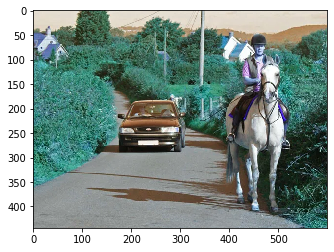

In [3]:
car = cv2.imread(image_name)

plt.imshow(car)

#### Clean up image

1.  Increase size
2.  Fix color
3.  Remove axes


In [4]:
## create a function that cleans up and displays the image
def plt_show(image, title="", gray = False, size = (12,10)):
    from pylab import rcParams
    temp = image 
    
    #fix colour
    if gray == False:
        temp = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
    
    #change image size
    rcParams['figure.figsize'] = [10,10]
    #remove axes ticks
    plt.axis("off")
    plt.title(title)
    plt.imshow(temp, cmap='gray')
    plt.show()

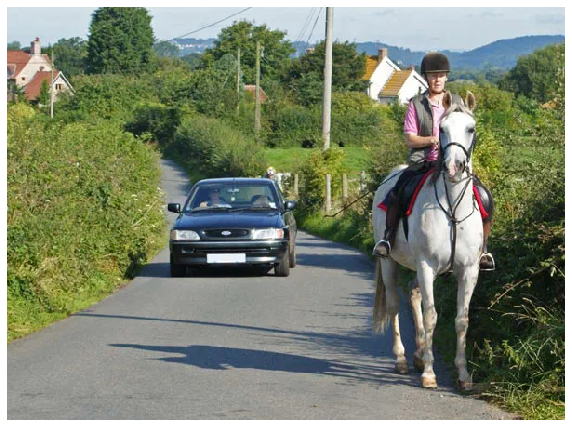

In [5]:
plt_show(car)

## Detecting the Object using Haar Cascades


These pre-trained, Haar Cascades ([Wikipedia](https://en.wikipedia.org/wiki/Haar-like_features?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkCV0101ENSkillsNetwork19816089-2022-01-01)), were originally developed by [Viola & Jones (2001)](http://wearables.cc.gatech.edu/paper_of_week/viola01rapid.pdf?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkCV0101ENSkillsNetwork19816089-2022-01-01).


To see the available Haar cascades, visit the OpenCV Github repository on Haar Cascades:

> Haar Cascades ([Github link](https://github.com/andrewssobral/vehicle_detection_haarcascades), [OpenCV doc](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkCV0101ENSkillsNetwork19816089-2022-01-01))


#### Download the car detection Haar cascade

> cars.xml


In [6]:
haarcascade_url = 'https://raw.githubusercontent.com/andrewssobral/vehicle_detection_haarcascades/master/cars.xml'
haar_name = "cars.xml"
urllib.request.urlretrieve(haarcascade_url, haar_name)

('cars.xml', <http.client.HTTPMessage at 0x10a5d8390>)

#### Create the image detection classifier using the Haar cascade


In [7]:
detector = cv2.CascadeClassifier("cars.xml")

#### Detect car


In [9]:
cars_list = detector.detectMultiScale(car)
print(cars_list)

[[119 139 222 222]]


#### Draw rectangle around the car


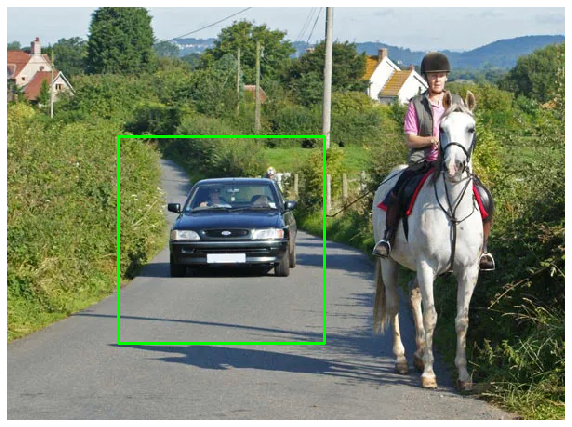

In [10]:
for car1 in cars_list: #for each car, draw a rectangle around it
        (x, y, w, h) = car1
        cv2.rectangle(car, 
                      (x, y),  #bottom-left corner
                      (x + w, y + h), 
                      (0, 255, 0), #color
                      2) #line thickness
        
plt_show(car)

#### Create a function to detect car using the classifier


In [14]:
def detect_cars(image):
    ## create a temp image to be used to avoid altering the original one
    temp = image
    
    
    #convert the temp image to gray scale as opencv face detector expects gray images
    gray_image = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)
    
    #detect cars on the gray image
    cars_list = detector.detectMultiScale(gray_image)
    
    print("Number of cars detected: " + str(len(cars_list)))
    print("cars_list: " + str(cars_list))
    
    #for each car detected, draw a rectangle around it
    for car in cars_list: 
        (x, y, w, h) = car
        cv2.rectangle(temp, (x, y), (x + w, y + h), (0, 255, 0), 4) 
    
    plt_show(temp) 

Number of cars detected: 1
cars_list: [[119 139 222 222]]


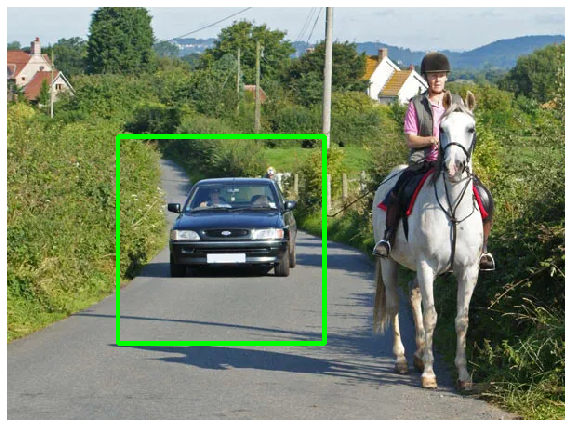

In [15]:
car = cv2.imread("car-road-behind.jpg")

detect_cars(car)

### Correcting exposure: Equalize histogram


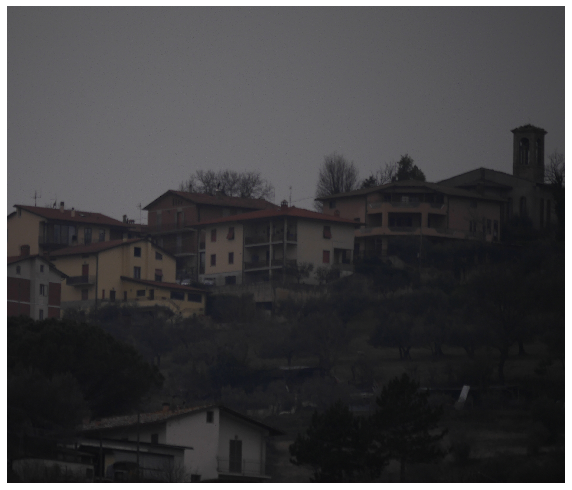

In [16]:
##get underexposed photo from this URL
urllib.request.urlretrieve("https://upload.wikimedia.org/wikipedia/commons/9/94/Underexposed_photo.JPG", "underexposed.jpg")
underexposed = cv2.imread('underexposed.jpg')
plt_show(underexposed)

#### Check histogram of underexposed.jpg


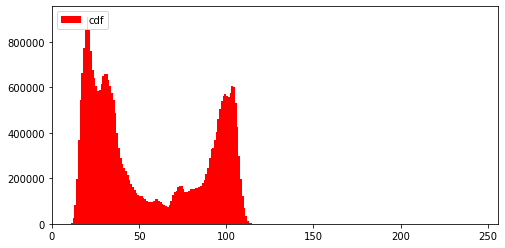

In [29]:
#From: http://docs.opencv.org/trunk/d5/daf/tutorial_py_histogram_equalization.html
rcParams['figure.figsize'] = 8,4
hist,bins = np.histogram(underexposed.flatten(),256,[0,256])
plt.hist(underexposed.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

#### Since most pixels are gathered at the left, we can say this is an underexposed image

> To correct this, we will have to equalize the picture (histogram) Convert to grayscale and equalize histogram.
> First convert image to grayscale


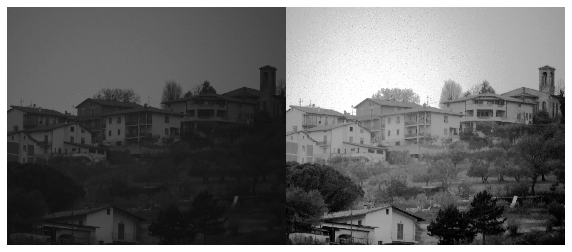

In [30]:
#Convert to grayscale
underexposed_gray = cv2.cvtColor(underexposed, cv2.COLOR_BGR2GRAY)

#equalizeHist
underexposed_equ = cv2.equalizeHist(underexposed_gray)

#stacking images side-by-side to view them
res = np.hstack((underexposed_gray, underexposed_equ)) 
#cv2.imwrite('res.png',res)
plt_show(res, gray = True)

#### New histogram (equalized)

> The Histogram shows the exposure is corrected


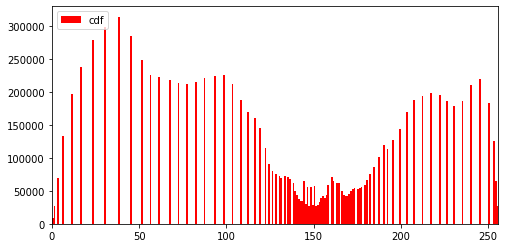

In [31]:
#From: http://docs.opencv.org/trunk/d5/daf/tutorial_py_histogram_equalization.html
rcParams['figure.figsize'] = 8,4
hist,bins = np.histogram(underexposed_equ.flatten(),256,[0,256])
plt.hist(underexposed_equ.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

#### Histogram equalization for colour images


In [92]:
urllib.request.urlretrieve("https://storage.needpix.com/rsynced_images/toronto-1267833_1280.jpg", "cn.jpg")

('cn.jpg', <http.client.HTTPMessage at 0x7f830c408710>)

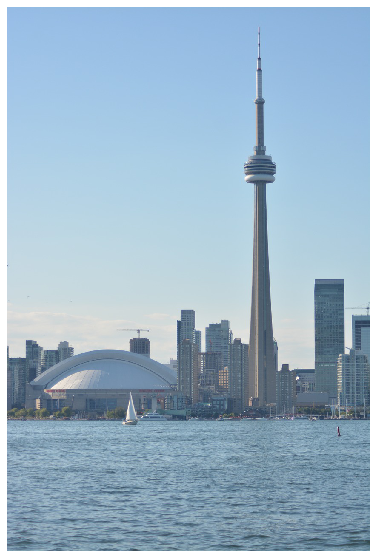

In [93]:
cn = cv2.imread('cn.jpg')
plt_show(cn)

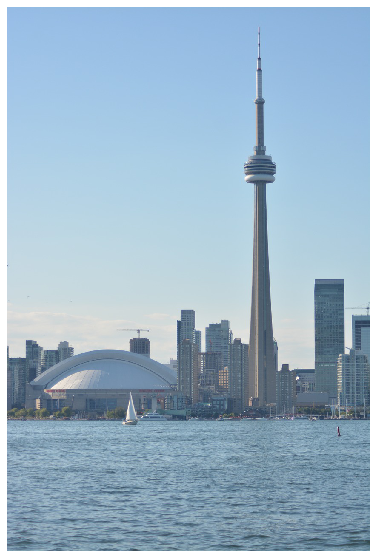

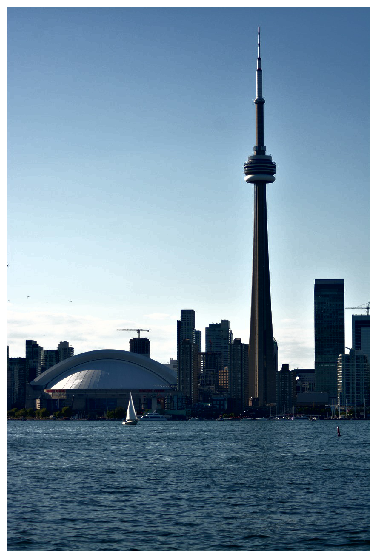

In [94]:
# Equalizing histograms of coloured images:
# From: https://www.packtpub.com/mapt/book/application_development/9781785283932/2/ch02lvl1sec26/enhancing-the-contrast-in-an-image

img_yuv = cv2.cvtColor(cn, cv2.COLOR_BGR2YUV)

# equalize the histogram of the Y channel
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

# convert the YUV image back to RGB format
img_equalized = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)


plt_show(cn)
plt_show(img_equalized)

### Canny edge detection


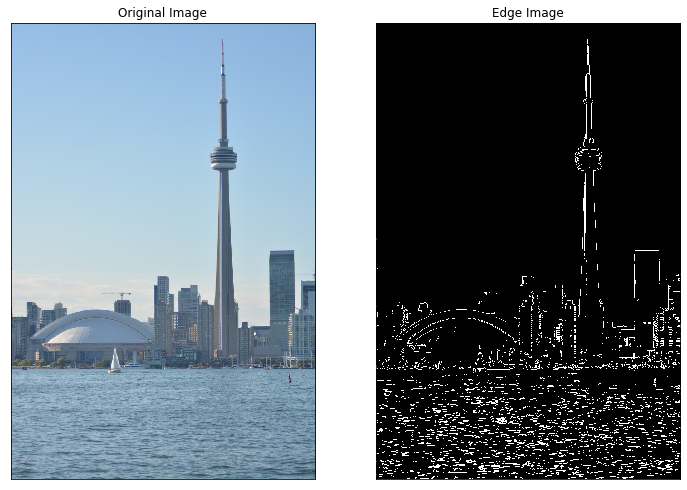

In [37]:
cn = cv2.imread("cn.jpg")
img = cv2.cvtColor(cn, cv2.COLOR_BGR2RGB)
edges = cv2.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

<hr>


<h1>Thank you for completing this notebook</h1>
You can read more about Watson Visual Recognition APIs from the following link.
<a href="https://cloud.ibm.com/apidocs/visual-recognition?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkCV0101ENSkillsNetwork19816089-2022-01-01&code=python">https://cloud.ibm.com/apidocs/visual-recognition</a>


<div class="alert alert-block alert-info" style="margin-top: 20px">
<h2>Get IBM Watson Studio free of charge!</h2>
    <p><a href="https://cocl.us/NotebooksPython101bottom?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkCV0101ENSkillsNetwork19816089-2022-01-01"><img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Logo/BottomAd.png" width="750" align="center"></a></p>
</div>


<h3>About the Authors:</h3>
<p>This notebook was written by by Nayef Abou Tayoun <p> 
<p><a href="https://www.linkedin.com/in/nayefaboutayoun/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkCV0101ENSkillsNetwork19816089-2022-01-01" target="_blank">Nayef Abou Tayoun</a> is a Cognitive Data Scientist at IBM, and pursuing a Master's degree in Artificial intelligence </p>
